<ipython-input-38-4c7052987f55>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # مثال: تعبئة القيم المفقودة في عمود 'Age' بالمتوسط
<ipython-input-38-4c7052987f55>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replac

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809       0           No   22        No     Healthcare              1.0   
1  462643       1          Yes   38       Yes       Engineer              0.0   
2  466315       1          Yes   67       Yes       Engineer              1.0   
3  461735       0          Yes   67       Yes         Lawyer              0.0   
4  462669       1          Yes   40       Yes  Entertainment              0.0   

   Spending_Score  Family_Size Segmentation  
0               0          4.0            D  
1               1          3.0            A  
2               0          1.0            B  
3               2          2.0            B  
4               2          6.0            A  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   

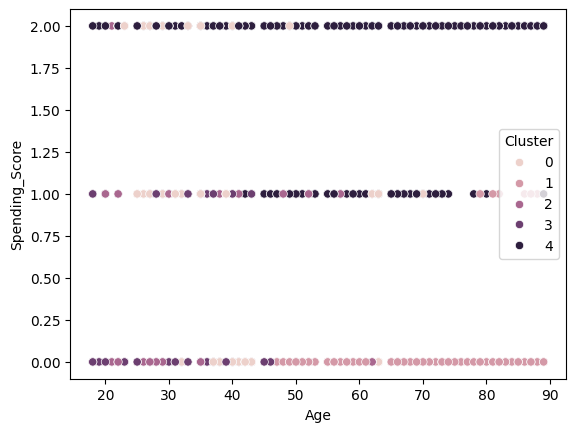

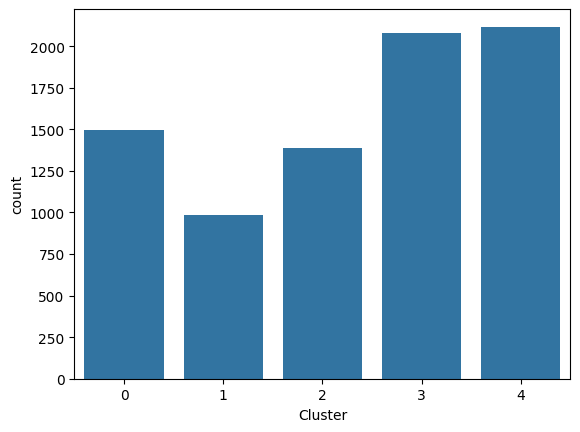

Cluster 2:
               Age  Spending_Score  Work_Experience  Family_Size
count  1388.000000     1388.000000      1388.000000  1388.000000
mean     30.659942        0.191643         1.192363     5.005764
std       9.892701        0.433812         1.900487     1.279294
min      18.000000        0.000000         0.000000     4.000000
25%      23.000000        0.000000         0.000000     4.000000
50%      29.000000        0.000000         1.000000     5.000000
75%      36.000000        0.000000         1.000000     6.000000
max      83.000000        2.000000        11.000000     9.000000
Cluster 3:
               Age  Spending_Score  Work_Experience  Family_Size
count  2081.000000     2081.000000      2081.000000  2081.000000
mean     33.554541        0.179241         0.779914     2.132878
std       7.692593        0.383646         1.070406     0.770447
min      18.000000        0.000000         0.000000     1.000000
25%      28.000000        0.000000         0.000000     2.000000
50%

In [38]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# اقرأ البيانات مع الفاصلة كفاصل
df = pd.read_csv('/content/Train.csv', sep=';')

df.isnull().sum()  # تحقق من وجود قيم مفقودة في كل عمود
df['Age'].fillna(df['Age'].mean(), inplace=True)  # مثال: تعبئة القيم المفقودة في عمود 'Age' بالمتوسط

df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})  # مثال: تحويل القيم النصية إلى رقمية

# ملئ الخانات الفارغة بما يناسبها لكل عمود
df['Ever_Married'].fillna('no', inplace=True)
df['Graduated'].fillna('no', inplace=True)
df['Profession'].fillna('unemployed', inplace=True)
# Replacing 'nan' string with 0 in 'Work_Experience' and converting to numeric
df['Work_Experience'] = pd.to_numeric(df['Work_Experience'].replace('nan', 0), errors='coerce')
df['Work_Experience'].fillna(0, inplace=True) # Fill remaining NaNs with 0

df['Ever_Married'].fillna('no', inplace=True)
df['Family_Size'].fillna(df['Family_Size'].mean(), inplace=True)
# حذف الاعمدة الغير مرغوب فيها
df = df.drop('Var_1', axis=1)

# Convert 'Spending_Score' to numerical representation
spending_score_mapping = {'Low': 0, 'Average': 1, 'High': 2}  # Adjust mapping as needed
df['Spending_Score'] = df['Spending_Score'].map(spending_score_mapping)


print(df.head())  # عرض أول 5 صفوف
print(df.info())  # عرض معلومات حول الأعمدة والأنواع
print(df.describe())# عرض الإحصائيات الوصفية

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# تحديد الميزات
features = ['Age', 'Spending_Score', 'Work_Experience', 'Family_Size'] # اختر الميزات التي تريدها

# تحجيم الميزات
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


# مخطط مبعثر
sns.scatterplot(x='Age', y='Spending_Score', hue='Cluster', data=df)
plt.show()

# مخطط شريطي
sns.countplot(x='Cluster', data=df)
plt.show()

for cluster in df['Cluster'].unique():
    print(f"Cluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data[features].describe())  # Descriptive statistics
    # You can also add visualizations here (e.g., box plots, histograms) for each feature within the cluster.



# ... (your existing code) ...

# Cluster Analysis Insights and Recommendations:
# ---------------------------------------------
# Cluster 0: Potentially retired or older individuals with limited spending power.
#   - Recommendations: Focus on essential products and services, competitive pricing, retirement planning, healthcare offers.
# Cluster 1: Possibly young professionals or singles with disposable income.
#   - Recommendations: Offer trendy products and experiences, flexible payment options, leverage social media and influencer marketing.
# Cluster 2: Likely established professionals with families and moderate spending habits.
#   - Recommendations: Promote family-oriented products and services, value and convenience, emphasize durability and safety.
# Cluster 3: Could be students or young adults with limited income.
#   - Recommendations: Provide entry-level products and services, budget-friendly options, offer educational resources and career guidance.
# Cluster 4: Potentially affluent families with high spending power.
#   - Recommendations: Showcase premium products and services, exclusive benefits, focus on luxury and status.